# The purpose of this ipython script is to generate *simulated* dataset which encodes the voltage unbalance information

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
csv_file='simulated_voltage_unbalance_data.csv'

In [3]:
# Generate synthetic data
np.random.seed(0)

# Number of samples
n_samples = 10000

# Power demand in MW (random values)
power_demand = np.random.normal(1000, 250, n_samples)

# Month of the year (random values from 1 to 12)
month = np.random.randint(1, 13, n_samples)

# Day of the week (random values from 0 to 6, 0=Monday, 6=Sunday)
day_of_week = np.random.randint(0, 7, n_samples)

# Time of the day (random values from 0 to 23, representing hours)
time_of_day = np.random.randint(0, 24, n_samples)

# Normalize features
scaler = MinMaxScaler()
power_demand_normalized = scaler.fit_transform(power_demand.reshape(-1, 1)).flatten()
month_normalized = scaler.fit_transform(month.reshape(-1, 1)).flatten()
day_of_week_normalized = scaler.fit_transform(day_of_week.reshape(-1, 1)).flatten()
time_of_day_normalized = scaler.fit_transform(time_of_day.reshape(-1, 1)).flatten()

# Adjust the relationship between features and voltage unbalance
# Consider peak hours (11am - 5pm) for higher unbalance
# Adjust for decreasing trend above peak hours
voltage_unbalance = (
    0.1 * power_demand_normalized +
    0.01 * month_normalized +
    0.05 * day_of_week_normalized +
    0.25 * time_of_day_normalized +
    np.where((time_of_day >= 11) & (time_of_day <= 14), time_of_day_normalized*np.random.rand()*0.44, 0) +
    np.where((time_of_day > 14) & (time_of_day <= 17), time_of_day_normalized*np.random.rand()*0.1, 0) +# Adjust for peak hours
    np.where(time_of_day > 17, -time_of_day_normalized+0.82, 0) +  # Decreasing trend above peak hours
    np.random.normal(0, 0.01, n_samples)
)



# Create a DataFrame
data = pd.DataFrame({
    'Power Demand (MW)': power_demand,
    'Month': month,
    'Day of the Week': day_of_week,
    'Time of the Day (Hour)': time_of_day,
    'Voltage Unbalance': voltage_unbalance
})

# Save the dataset to a CSV file
data.to_csv(csv_file, index=False)

# Display the first few rows of the dataset
print(data.head())

   Power Demand (MW)  Month  Day of the Week  Time of the Day (Hour)  \
0        1441.013086      1                0                       7   
1        1100.039302      5                3                      22   
2        1244.684496      2                0                      18   
3        1560.223300     12                0                      19   
4        1466.889498      2                1                      12   

   Voltage Unbalance  
0           0.149892  
1           0.190933  
2           0.299177  
3           0.291611  
4           0.261935  


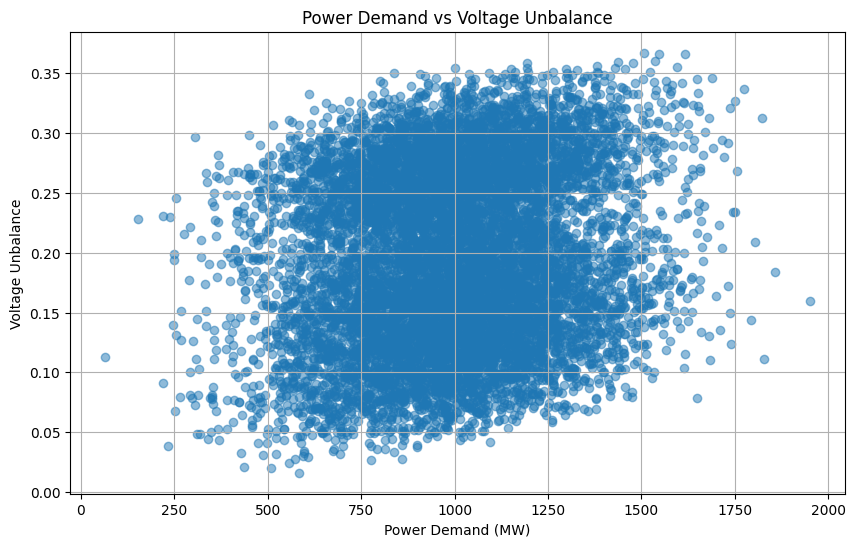

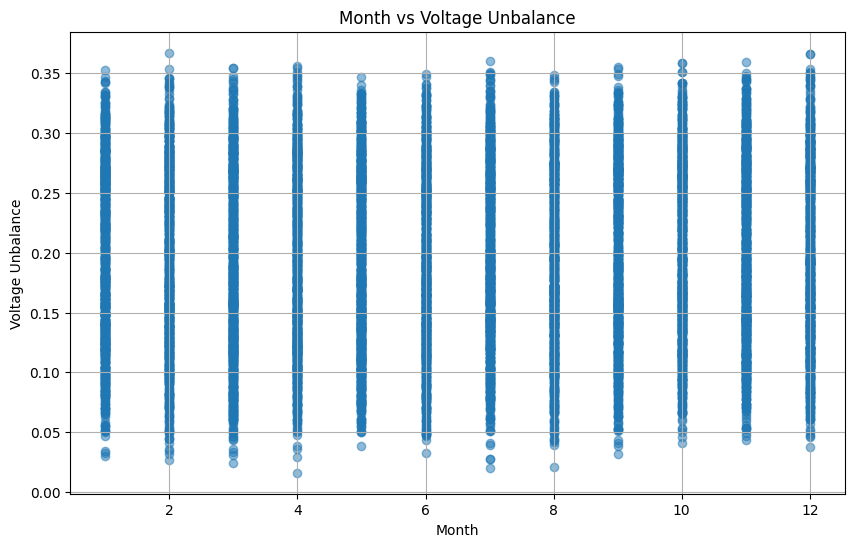

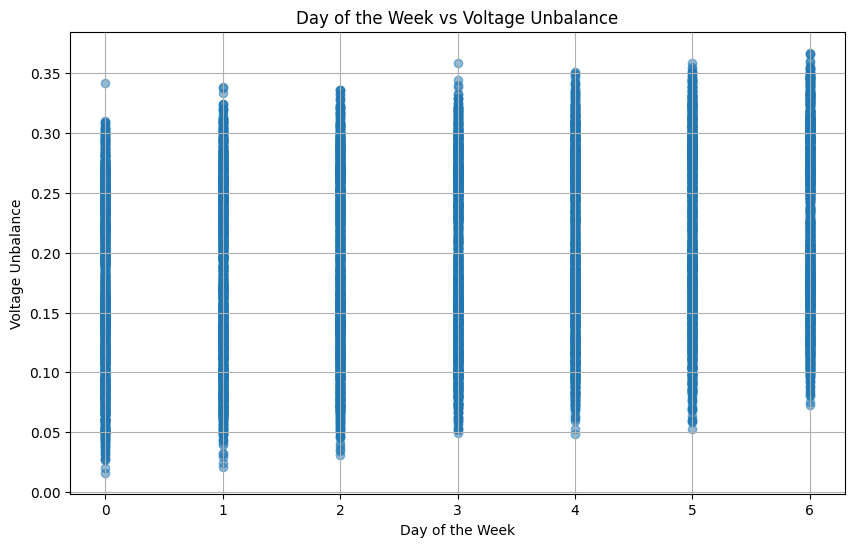

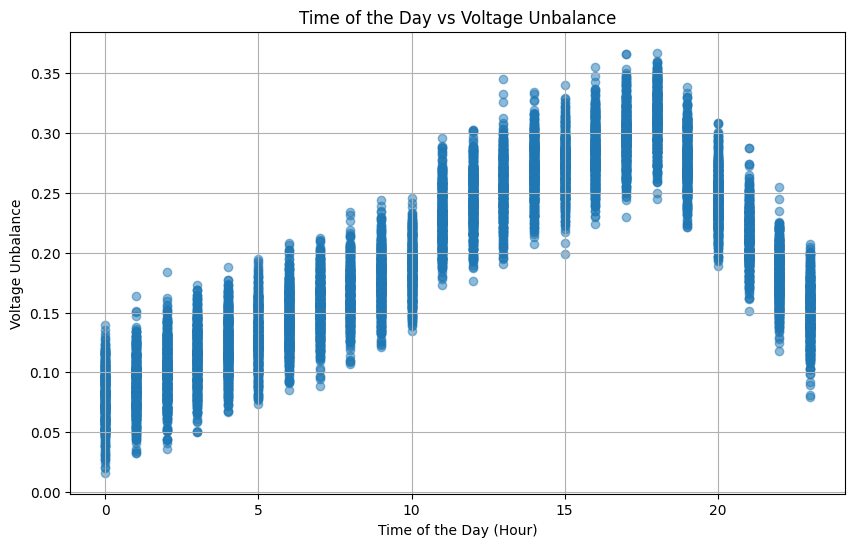

In [4]:
# Load the dataset
data = pd.read_csv(csv_file)

# Plot Power Demand vs Voltage Unbalance
plt.figure(figsize=(10, 6))
plt.scatter(data['Power Demand (MW)'], data['Voltage Unbalance'], alpha=0.5)
plt.title('Power Demand vs Voltage Unbalance')
plt.xlabel('Power Demand (MW)')
plt.ylabel('Voltage Unbalance')
plt.grid(True)
plt.show()

# Plot Month vs Voltage Unbalance
plt.figure(figsize=(10, 6))
plt.scatter(data['Month'], data['Voltage Unbalance'], alpha=0.5)
plt.title('Month vs Voltage Unbalance')
plt.xlabel('Month')
plt.ylabel('Voltage Unbalance')
plt.grid(True)
plt.show()

# Plot Day of the Week vs Voltage Unbalance
plt.figure(figsize=(10, 6))
plt.scatter(data['Day of the Week'], data['Voltage Unbalance'], alpha=0.5)
plt.title('Day of the Week vs Voltage Unbalance')
plt.xlabel('Day of the Week')
plt.ylabel('Voltage Unbalance')
plt.grid(True)
plt.show()

# Plot Time of the Day vs Voltage Unbalance
plt.figure(figsize=(10, 6))
plt.scatter(data['Time of the Day (Hour)'], data['Voltage Unbalance'], alpha=0.5)
plt.title('Time of the Day vs Voltage Unbalance')
plt.xlabel('Time of the Day (Hour)')
plt.ylabel('Voltage Unbalance')
plt.grid(True)
plt.show()